In [1]:
import os
import pandas as pd

CHEMIN_DOSSIER_DONNÉES = "../../../data_test/diamant"
DATE_FICHIER = '2022_09_01'
encoding = 'utf-8'

In [2]:
ann_ca_ej_et = pd.read_csv(os.path.join(CHEMIN_DOSSIER_DONNÉES, f'ANN_CA_EJ_ET_{DATE_FICHIER}.CSV'), delimiter=";", encoding=encoding, dtype='str')
ann_errd_ej_et = pd.read_csv(os.path.join(CHEMIN_DOSSIER_DONNÉES, f'ANN_ERRD_EJ_ET_{DATE_FICHIER}.CSV'), delimiter=";", encoding=encoding, dtype='str')

In [7]:
colonne_ca = "Nombre ETP total réalisé CA"
colonne_errd = "Nombre ETP total réalisé ERRD"
index = ["Année", "Finess"]

In [21]:
en_commun = ann_ca_ej_et.merge(ann_errd_ej_et, on=["Année", "Finess"], how="inner")

In [25]:
en_commun[["Finess", "Année", colonne_ca, colonne_errd]].count()

Finess                           223
Année                            223
Nombre ETP total réalisé CA      223
Nombre ETP total réalisé ERRD    164
dtype: int64

Des établissements ont des valeurs dans les 2 fichiers, devrait-on privilégier une source plutôt qu'une autre ?

In [40]:
ann_ca_ej_et[colonne_ca].astype(float).describe()

count    19019.000000
mean        29.670778
std        698.352635
min          0.000000
25%          6.505000
50%         13.590000
75%         27.500000
max      77509.200000
Name: Nombre ETP total réalisé CA, dtype: float64

In [29]:
ann_ca_ej_et[colonne_ca].astype(float).describe()

count    2.885300e+04
mean     1.994002e+02
std      2.039694e+04
min      0.000000e+00
25%      1.942000e+01
50%      3.987000e+01
75%      5.523000e+01
max      3.435177e+06
Name: Nombre ETP total réalisé ERRD, dtype: float64

Des établissements sanitaires pourraient figurer dans les données du fichier ERRD ?

In [58]:
quantile_999 = ann_ca_ej_et[colonne_ca].astype(float).quantile(.999)

In [60]:
type(quantile_999)

numpy.float64

<AxesSubplot: >

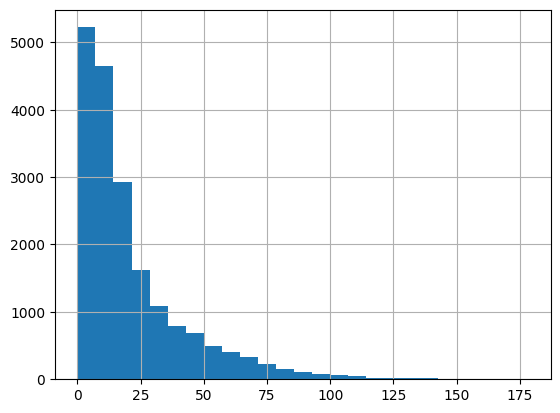

In [69]:
ann_ca_ej_et.loc[ann_ca_ej_et[colonne_ca].astype(float) < quantile_999, colonne_ca].astype(float).hist(bins=25)